In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('AAPL.csv')
# converts string to datetime
dataset['Date'] = pd.to_datetime(dataset.Date, format='%Y-%m-%d')
# ser the index of dataset to date column
dataset = dataset.set_index('Date')
dataset = dataset.dropna()

In [47]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,228.410004,229.179993,226.630005,228.360001,224.870499,27390100
2018-09-05,228.990005,229.669998,225.100006,226.869995,223.403275,33333000
2018-09-06,226.229996,227.350006,221.300003,223.100006,219.690903,34290000
2018-09-07,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500


In [48]:
# number of how many days to forecast
forecast_out = 60
dataset['Prediction'] = dataset['Adj Close'].shift(-forecast_out)

In [49]:
x = np.array(dataset.drop(['Prediction'], 1))
x = x[:-forecast_out]

In [50]:
y = np.array(dataset['Prediction'])
y = y[:-forecast_out]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [52]:
# train data
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

linear_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6672.785286661627, tolerance: 5.311965178717095
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
# each models score
linear_model_score = linear_model.score(x_test, y_test)
print('LinearModel Score:', linear_model_score)

ridge_model_score = ridge_model.score(x_test, y_test)
print('RidgeModel Score:', ridge_model_score)

lasso_model_score = lasso_model.score(x_test, y_test)
print('LassoModel Score:', lasso_model_score)

LinearModel Score: 0.7557602346611981
RidgeModel Score: 0.7512171431786904
LassoModel Score: 0.5431108601309458


In [56]:
x_forecast = np.array(dataset.drop(['Prediction'], 1))[-forecast_out:]
linear_model_forecast_prediction = linear_model.predict(x_forecast)
ridge_model_forecast_prediction = ridge_model.predict(x_forecast)
lasso_model_forecast_prediction = lasso_model.predict(x_forecast)

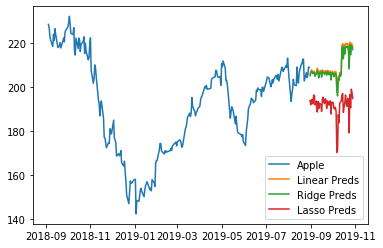

In [61]:
predicted_dates = []
recent_date = dataset.index.max()
for i in range(forecast_out):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)
    
plt.plot(dataset.index, dataset['Close'], label='Apple')
plt.plot(predicted_dates, linear_model_forecast_prediction, label='Linear Preds')
plt.plot(predicted_dates, ridge_model_forecast_prediction, label='Ridge Preds')
plt.plot(predicted_dates, lasso_model_forecast_prediction, label='Lasso Preds')
plt.legend()